<a href="https://colab.research.google.com/github/Hamza-Ali0237/MNIST-Classification-TensorFlow-Keras/blob/main/MNIST_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries & Dataset

In [28]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

from sklearn.model_selection import train_test_split

# Load The Dataset

In [29]:
data_mnist = mnist.load_data()

In [30]:
print(data_mnist)

((array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ...

# Split The Dataset

In [31]:
(X_train, y_train), (X_test, y_test) = data_mnist

### One-hot Encode Target Variable

In [32]:
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, 10)

### Split The Data Into Training, Validation, And Test

In [33]:
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
# X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

# Data Preprocessing

### Reshape The Data

In [34]:
X_train = X_train.reshape((X_train.shape[0], 28*28)).astype('float32')
# X_val = X_val.reshape((X_val.shape[0], 28*28)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 28*28)).astype('float32')

### Normalize The Data

In [35]:
X_train = X_train / 255
X_test = X_test / 255

In [36]:
print("Shape of X_train: ", X_train.shape)
print("Shape of y_train: ", y_train.shape)

# print("Shape of X_val: ", X_val.shape)
# print("Shape of y_val: ", y_val.shape)

print("Shape of X_test: ", X_test.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (60000, 784)
Shape of y_train:  (60000, 10)
Shape of X_test:  (10000, 784)
Shape of y_test:  (10000, 10)


# Create Baseline Model

In [37]:
def create_base_model(input_shape = 28*28):
  model = Sequential()
  model.add(Dense(64, activation='relu', input_dim = input_shape))
  model.add(Dense(32, activation='relu'))
  model.add(Dense(10, activation='softmax'))

  return (model)

In [38]:
# Create Base Model
base_model = create_base_model()

# Compile The Base Model
base_model.compile(optimizer='adam', loss="categorical_crossentropy", metrics=['accuracy'])

# Print Model Summary
base_model_summary = base_model.summary()
print(base_model_summary)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 64)                50240     
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 dense_14 (Dense)            (None, 10)                330       
                                                                 
Total params: 52650 (205.66 KB)
Trainable params: 52650 (205.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [39]:
hist_base_model = base_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=32)

Epoch 1/20
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2824 - accuracy: 0.9187 - val_loss: 0.1541 - val_accuracy: 0.9513
Epoch 2/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1270 - accuracy: 0.9623 - val_loss: 0.1039 - val_accuracy: 0.9675
Epoch 3/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0939 - accuracy: 0.9725 - val_loss: 0.1119 - val_accuracy: 0.9661
Epoch 4/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0740 - accuracy: 0.9772 - val_loss: 0.1093 - val_accuracy: 0.9664
Epoch 5/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0630 - accuracy: 0.9809 - val_loss: 0.0847 - val_accuracy: 0.9735
Epoch 6/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0519 - accuracy: 0.9833 - val_loss: 0.0804 - val_accuracy: 0.9765
Epoch 7/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0456 - accuracy: 0.9852 - val_loss: 0.0948 - val_accuracy:

### Plot Learning Curves

In [40]:
def plot_learning_curves(history):
    # Extracting accuracy and loss values from the history
    accuracy = history.history['accuracy']
    loss = history.history['loss']

    # Extracting validation accuracy and validation loss values if available
    if 'val_accuracy' in history.history:
        val_accuracy = history.history['val_accuracy']
        val_loss = history.history['val_loss']

    # Plotting accuracy
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(accuracy, label='Training Accuracy')
    if 'val_accuracy' in history.history:
        plt.plot(val_accuracy, label='Validation Accuracy')
        plt.legend()
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.grid(True)

    # Plotting loss
    plt.subplot(1, 2, 2)
    plt.plot(loss, label='Training Loss')
    if 'val_loss' in history.history:
        plt.plot(val_loss, label='Validation Loss')
        plt.legend()
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

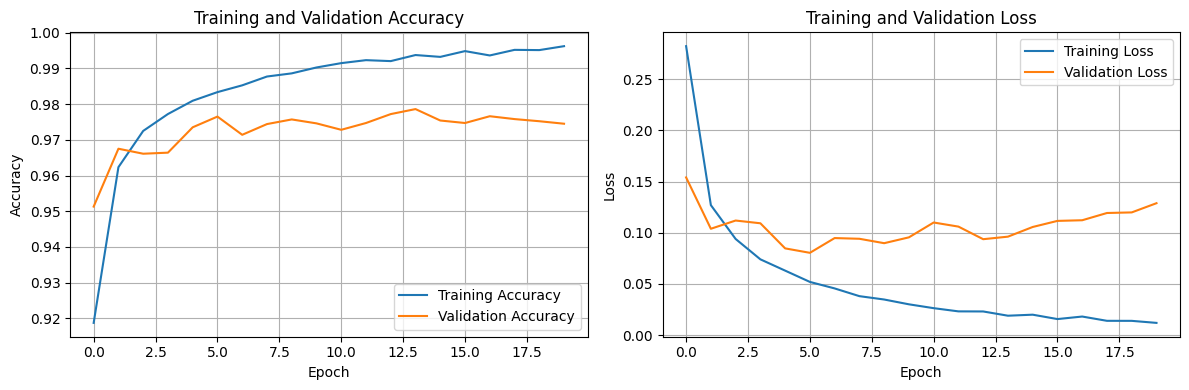

In [41]:
plot_learning_curves(hist_base_model)

The seems to be underfitting.

# Fine-tune Model

In [42]:
def create_fine_tuned_model(input_shape=28*28):
    model = Sequential()
    model.add(Dense(128, activation='relu', input_dim=input_shape))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(10, activation='softmax'))

    return model

In [43]:
fine_tuned_model = create_fine_tuned_model()

fine_tuned_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print Fine-Tuned Model Summary
fine_tuned_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 128)               100480    
                                                                 
 dense_16 (Dense)            (None, 64)                8256      
                                                                 
 dense_17 (Dense)            (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [44]:
# Train the Fine-Tuned Model
hist_fine_tuned_model = fine_tuned_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=64)

Epoch 1/20
938/938 [==============================] - 5s 4ms/step - loss: 0.2829 - accuracy: 0.9186 - val_loss: 15.4362 - val_accuracy: 0.9620
Epoch 2/20
938/938 [==============================] - 4s 4ms/step - loss: 0.1149 - accuracy: 0.9655 - val_loss: 8.8139 - val_accuracy: 0.9746
Epoch 3/20
938/938 [==============================] - 5s 6ms/step - loss: 0.0782 - accuracy: 0.9761 - val_loss: 6.3401 - val_accuracy: 0.9835
Epoch 4/20
938/938 [==============================] - 4s 4ms/step - loss: 0.0573 - accuracy: 0.9823 - val_loss: 4.2432 - val_accuracy: 0.9883
Epoch 5/20
938/938 [==============================] - 4s 4ms/step - loss: 0.0451 - accuracy: 0.9860 - val_loss: 2.9559 - val_accuracy: 0.9918
Epoch 6/20
938/938 [==============================] - 4s 5ms/step - loss: 0.0371 - accuracy: 0.9881 - val_loss: 2.9013 - val_accuracy: 0.9908
Epoch 7/20
938/938 [==============================] - 4s 4ms/step - loss: 0.0304 - accuracy: 0.9905 - val_loss: 1.2422 - val_accuracy: 0.9952
Epoch

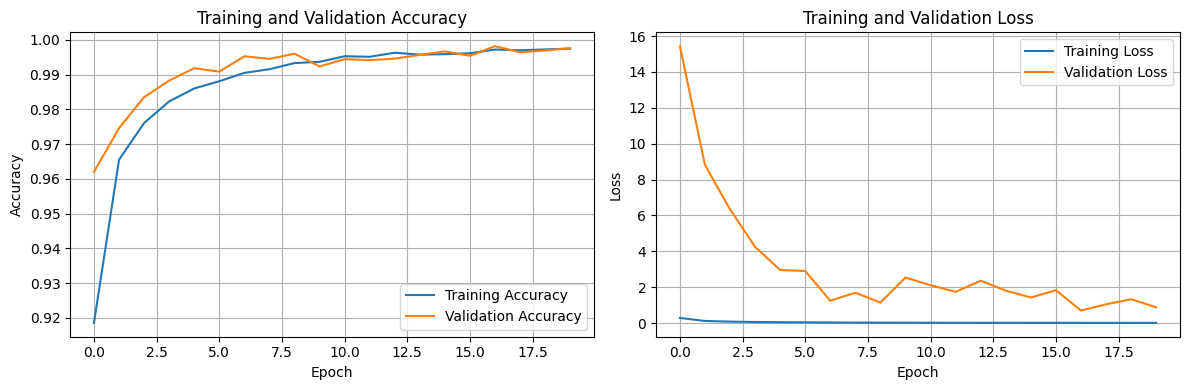

In [45]:
plot_learning_curves(hist_fine_tuned_model)

The model appears to be performing a lot better now.